# PART A

# Question 1

In [434]:
import pandas as pd

data = pd.read_csv("train_series.csv")


In [116]:
print(data['MONTH'].unique())

#Here I just wanted to make sure the data only contained these months

['JUNE' 'MAY' 'APRIL' 'MARCH' 'FEBRUARY' 'JANUARY']


In [435]:
# Extract the month from the MONTHS column
data["new_months"] = data["MONTH"]

# Pivot the data
pivoted_1 = pd.pivot_table(data, index=["ID"], columns=["new_months"], values=["PAY", "BILL_AMT", "PAY_AMT"])

pivoted_1.columns = [f"{col[0]}_{col[1].upper()}" for col in pivoted_1.columns]

pivoted_1 = pivoted_1.reset_index()

pivoted_1

,ID,BILL_AMT_APRIL,BILL_AMT_FEBRUARY,BILL_AMT_JANUARY,BILL_AMT_JUNE,BILL_AMT_MARCH,BILL_AMT_MAY,PAY_APRIL,PAY_FEBRUARY,PAY_JANUARY,PAY_JUNE,PAY_MARCH,PAY_MAY,PAY_AMT_APRIL,PAY_AMT_FEBRUARY,PAY_AMT_JANUARY,PAY_AMT_JUNE,PAY_AMT_MARCH,PAY_AMT_MAY
0,0,13600.0,44024.0,18697.0,28991.0,0.0,24391.0,0.0,-1.0,0.0,-1.0,0.0,0.0,0.0,680.0,10000.0,1300.0,22373.0,1000.0
1,1,53169.0,50372.0,49470.0,75662.0,50875.0,70073.0,0.0,0.0,0.0,0.0,0.0,0.0,2000.0,1903.0,2006.0,3212.0,1603.0,2106.0
2,2,161487.0,168094.0,170922.0,155910.0,157577.0,158819.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,5500.0,1000.0,6800.0,13000.0,6500.0
3,3,0.0,0.0,0.0,23570.0,0.0,735.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.0,0.0,0.0,742.0,0.0,0.0
4,4,9044.0,9417.0,9617.0,8214.0,9225.0,8034.0,0.0,0.0,0.0,0.0,0.0,0.0,331.0,356.0,330.0,1140.0,341.0,1150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,29993,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0
19996,29996,0.0,2580.0,6941.0,0.0,2580.0,0.0,-2.0,0.0,-1.0,1.0,-1.0,-2.0,2580.0,6941.0,0.0,0.0,0.0,0.0
19997,29997,46777.0,8824.0,9009.0,47194.0,39420.0,48381.0,0.0,0.0,0.0,0.0,0.0,0.0,1530.0,327.0,329.0,2002.0,1000.0,2000.0
19998,29998,29435.0,29434.0,16565.0,28409.0,30841.0,28530.0,0.0,0.0,0.0,0.0,0.0,0.0,2000.0,331.0,0.0,2000.0,1765.0,2000.0


# QUESTION 2

In [436]:
#merge the two dataframes

customers = pd.read_csv("train_customers.csv")

merged_df = pd.merge(pivoted_1,customers,how="inner", on="ID")
merged_df

,ID,BILL_AMT_APRIL,BILL_AMT_FEBRUARY,BILL_AMT_JANUARY,BILL_AMT_JUNE,BILL_AMT_MARCH,BILL_AMT_MAY,PAY_APRIL,PAY_FEBRUARY,PAY_JANUARY,...,PAY_AMT_FEBRUARY,PAY_AMT_JANUARY,PAY_AMT_JUNE,PAY_AMT_MARCH,PAY_AMT_MAY,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE
0,0,13600.0,44024.0,18697.0,28991.0,0.0,24391.0,0.0,-1.0,0.0,...,680.0,10000.0,1300.0,22373.0,1000.0,40000.0,2,2,2,26
1,1,53169.0,50372.0,49470.0,75662.0,50875.0,70073.0,0.0,0.0,0.0,...,1903.0,2006.0,3212.0,1603.0,2106.0,80000.0,2,3,1,59
2,2,161487.0,168094.0,170922.0,155910.0,157577.0,158819.0,2.0,2.0,2.0,...,5500.0,1000.0,6800.0,13000.0,6500.0,170000.0,2,1,2,30
3,3,0.0,0.0,0.0,23570.0,0.0,735.0,-2.0,-2.0,-2.0,...,0.0,0.0,742.0,0.0,0.0,200000.0,2,2,1,41
4,4,9044.0,9417.0,9617.0,8214.0,9225.0,8034.0,0.0,0.0,0.0,...,356.0,330.0,1140.0,341.0,1150.0,50000.0,1,2,1,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,29993,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,30000.0,2,3,1,41
19996,29996,0.0,2580.0,6941.0,0.0,2580.0,0.0,-2.0,0.0,-1.0,...,6941.0,0.0,0.0,0.0,0.0,360000.0,2,1,1,54
19997,29997,46777.0,8824.0,9009.0,47194.0,39420.0,48381.0,0.0,0.0,0.0,...,327.0,329.0,2002.0,1000.0,2000.0,50000.0,2,3,1,29
19998,29998,29435.0,29434.0,16565.0,28409.0,30841.0,28530.0,0.0,0.0,0.0,...,331.0,0.0,2000.0,1765.0,2000.0,30000.0,2,2,2,21


# Question 3

In [437]:
# again create another dataframe with the merged tables

train_target = pd.read_csv("train_target.csv")

final_table = pd.merge(merged_df,train_target, how="inner", on ="ID")
final_table

,ID,BILL_AMT_APRIL,BILL_AMT_FEBRUARY,BILL_AMT_JANUARY,BILL_AMT_JUNE,BILL_AMT_MARCH,BILL_AMT_MAY,PAY_APRIL,PAY_FEBRUARY,PAY_JANUARY,...,PAY_AMT_JANUARY,PAY_AMT_JUNE,PAY_AMT_MARCH,PAY_AMT_MAY,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,DEFAULT_JULY
0,0,13600.0,44024.0,18697.0,28991.0,0.0,24391.0,0.0,-1.0,0.0,...,10000.0,1300.0,22373.0,1000.0,40000.0,2,2,2,26,0
1,1,53169.0,50372.0,49470.0,75662.0,50875.0,70073.0,0.0,0.0,0.0,...,2006.0,3212.0,1603.0,2106.0,80000.0,2,3,1,59,0
2,2,161487.0,168094.0,170922.0,155910.0,157577.0,158819.0,2.0,2.0,2.0,...,1000.0,6800.0,13000.0,6500.0,170000.0,2,1,2,30,1
3,3,0.0,0.0,0.0,23570.0,0.0,735.0,-2.0,-2.0,-2.0,...,0.0,742.0,0.0,0.0,200000.0,2,2,1,41,1
4,4,9044.0,9417.0,9617.0,8214.0,9225.0,8034.0,0.0,0.0,0.0,...,330.0,1140.0,341.0,1150.0,50000.0,1,2,1,43,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,29993,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,30000.0,2,3,1,41,0
19996,29996,0.0,2580.0,6941.0,0.0,2580.0,0.0,-2.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,360000.0,2,1,1,54,0
19997,29997,46777.0,8824.0,9009.0,47194.0,39420.0,48381.0,0.0,0.0,0.0,...,329.0,2002.0,1000.0,2000.0,50000.0,2,3,1,29,1
19998,29998,29435.0,29434.0,16565.0,28409.0,30841.0,28530.0,0.0,0.0,0.0,...,0.0,2000.0,1765.0,2000.0,30000.0,2,2,2,21,0


# PART B

# Question 4

In [438]:
import plotly.express as px

barchart = px.histogram(final_table, x ="EDUCATION", y="ID",
                        color="DEFAULT_JULY", barmode="group",histfunc="count",height=400)

barchart

# Question 5

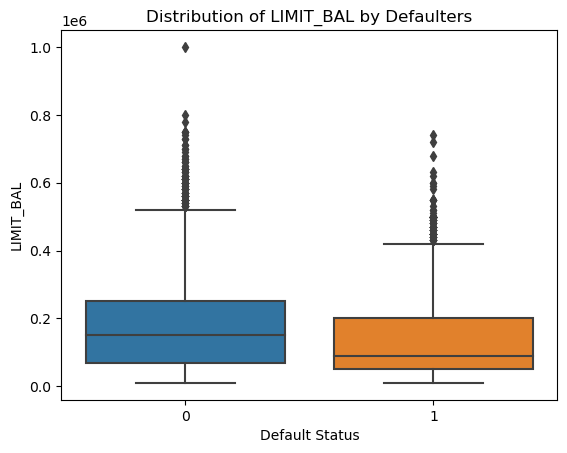

In [439]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create a box plot of LIMIT_BAL by NEXT_MONTH_DEFAULT
sns.boxplot(y="LIMIT_BAL", x="DEFAULT_JULY", data=final_table)

# Add plot labels
plt.title("Distribution of LIMIT_BAL by Defaulters")
plt.xlabel("Default Status")
plt.ylabel("LIMIT_BAL")

# Show the plot
plt.show()

# Question 6

Insight 1

Limit Balance seen by education levels of the clients

<AxesSubplot:xlabel='EDUCATION', ylabel='LIMIT_BAL'>

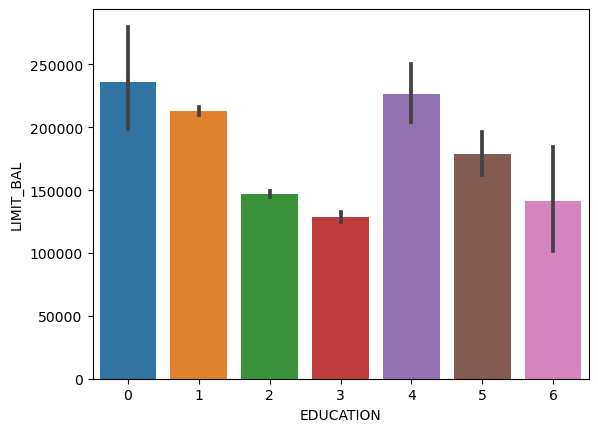

In [440]:
# load data
train = pd.read_csv('train_customers.csv')
target = pd.read_csv('train_target.csv')

# merge data
data = pd.merge(train, target, on='ID')

# plot default rate by education level
sns.barplot(x='EDUCATION',y='LIMIT_BAL', data=data)



With this insight you can see how education levels affect limit balance, which can be used in a prediction model to see probabilities of another client with a certain education level to have a certain balance limit

Insight 2

-> Correlation between education and marriage



In [441]:
# calculate the correlation between education and marriage
corr = final_table['EDUCATION'].corr(final_table['MARRIAGE'])

# print the correlation
print("Correlation between education and marriage: ", corr)

Correlation between education and marriage:  -0.1496036925572084


-> This means that as the level of education increases, the likelihood of being married slightly decreases, and vice versa

Insight 3

In [442]:
final_table

,ID,BILL_AMT_APRIL,BILL_AMT_FEBRUARY,BILL_AMT_JANUARY,BILL_AMT_JUNE,BILL_AMT_MARCH,BILL_AMT_MAY,PAY_APRIL,PAY_FEBRUARY,PAY_JANUARY,...,PAY_AMT_JANUARY,PAY_AMT_JUNE,PAY_AMT_MARCH,PAY_AMT_MAY,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,DEFAULT_JULY
0,0,13600.0,44024.0,18697.0,28991.0,0.0,24391.0,0.0,-1.0,0.0,...,10000.0,1300.0,22373.0,1000.0,40000.0,2,2,2,26,0
1,1,53169.0,50372.0,49470.0,75662.0,50875.0,70073.0,0.0,0.0,0.0,...,2006.0,3212.0,1603.0,2106.0,80000.0,2,3,1,59,0
2,2,161487.0,168094.0,170922.0,155910.0,157577.0,158819.0,2.0,2.0,2.0,...,1000.0,6800.0,13000.0,6500.0,170000.0,2,1,2,30,1
3,3,0.0,0.0,0.0,23570.0,0.0,735.0,-2.0,-2.0,-2.0,...,0.0,742.0,0.0,0.0,200000.0,2,2,1,41,1
4,4,9044.0,9417.0,9617.0,8214.0,9225.0,8034.0,0.0,0.0,0.0,...,330.0,1140.0,341.0,1150.0,50000.0,1,2,1,43,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,29993,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,30000.0,2,3,1,41,0
19996,29996,0.0,2580.0,6941.0,0.0,2580.0,0.0,-2.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,360000.0,2,1,1,54,0
19997,29997,46777.0,8824.0,9009.0,47194.0,39420.0,48381.0,0.0,0.0,0.0,...,329.0,2002.0,1000.0,2000.0,50000.0,2,3,1,29,1
19998,29998,29435.0,29434.0,16565.0,28409.0,30841.0,28530.0,0.0,0.0,0.0,...,0.0,2000.0,1765.0,2000.0,30000.0,2,2,2,21,0


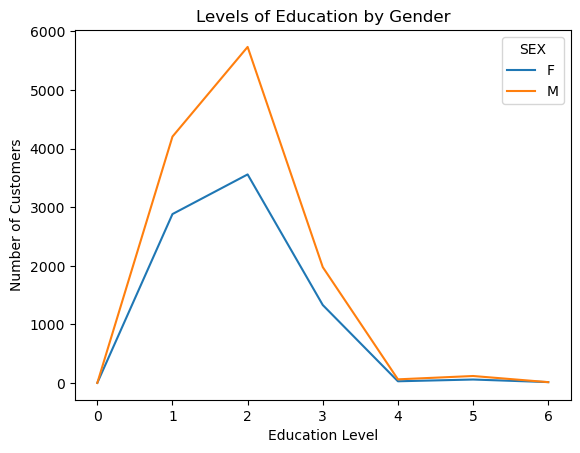

In [443]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = final_table.copy()

# Replace 'F' with 1 and 'M' with 2 in the 'SEX' column for the plot
df['SEX'] = df['SEX'].replace({1: 'F', 2: 'M'})

# Create line chart
df.groupby(['EDUCATION', 'SEX'])['ID'].count().unstack().plot.line()

# Set chart title and axis labels
plt.title('Levels of Education by Gender')
plt.xlabel('Education Level')
plt.ylabel('Number of Customers')

# Show chart
plt.show()

By comparing education with sex, you can see a clear and equal trend across both sexes, with levels 1,2, and 3 being the highet and creatng the tipping point for levels 4 to 6. From this line graph the important factors are that clients are more seen in those higher counts of education levels, and that there are more female clients than male clients

# PART C

# QUESTION 7

Build a machine learning model to estimate the probability of default.

-> I first made an accuracy score on the training data for reference, which is in the first cell

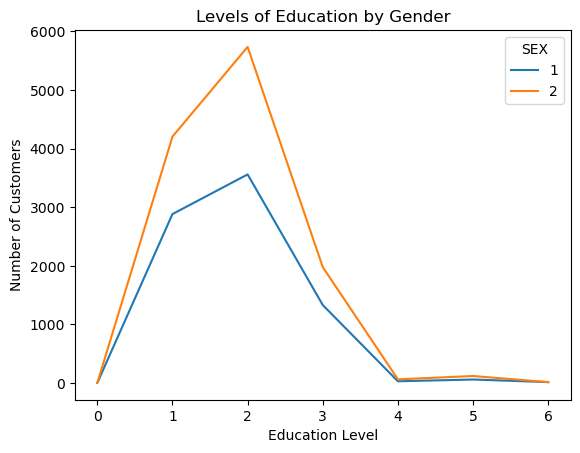

Best Parameters:  {'max_depth': 7, 'min_samples_split': 4, 'n_estimators': 100}
Best Score:  0.8234375
Accuracy Score:  0.81175


In [447]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Load data
df = final_table.copy()

# Replace 'F' with 1 and 'M' with 2 in the 'SEX' column for the plot
df['SEX'] = df['SEX'].replace({'F': 1, 'M': 2})

# Create line chart
df.groupby(['EDUCATION', 'SEX'])['ID'].count().unstack().plot.line()

# Set chart title and axis labels
plt.title('Levels of Education by Gender')
plt.xlabel('Education Level')
plt.ylabel('Number of Customers')

# Show chart
plt.show()

X = final_table.iloc[:,:-1]
y = final_table["DEFAULT_JULY"]

X_train,X_test,y_train,y_test=train_test_split(
    X,y, 
    train_size = 0.80, 
    random_state = 48)

rf = RandomForestClassifier()

# Create parameter to search over
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [3, 5, 7],
              'min_samples_split': [2, 4, 6]}

# With grid search paramenteers I now create the cross-validation
rf_cv = GridSearchCV(rf, param_grid, cv=5)
rf_cv.fit(X_train, y_train)

# Print both values
print("Best Parameters: ", rf_cv.best_params_)
print("Best Score: ", rf_cv.best_score_)

# Use the value to get use in the model
rf_best = RandomForestClassifier(**rf_cv.best_params_)
rf_best.fit(X_train, y_train)

# Predict and acheive an accuracy score of the model
y_pred = rf_best.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

In [448]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Put the data files as variables for ease
cust_file = "train_customers.csv"
series_file = "train_series.csv"
target_file = "train_target.csv"
sub_file = "submission_features.csv"

customers = pd.read_csv(cust_file)
series = pd.read_csv(series_file)
target = pd.read_csv(target_file)
submission = pd.read_csv(sub_file)

# Merge the data into a single DataFrame
dataframe = pd.merge(customers, series, on="ID")
dataframe = pd.merge(dataframe, target, on="ID")

# Group and aggregate columns by month and ID
dataframe_time = series.groupby(['ID', 'MONTH']).agg({'PAY': 'sum', 'BILL_AMT': 'sum', 'PAY_AMT': 'sum'})
dataframe_time.columns = [f'{col}_MONTH' for col in dataframe_time.columns]
dataframe_pivot = dataframe_time.reset_index().pivot(index='ID', columns='MONTH')
dataframe_pivot.columns = [f'{col[0]}_{col[1]}' for col in dataframe_pivot.columns]
dataframe = pd.merge(customers, dataframe_pivot, on='ID')
dataframe = pd.merge(dataframe, target, on="ID")

# Fill missing values
dataframe.fillna(0, inplace=True)

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(dataframe.drop(columns=["ID", "DEFAULT_JULY"]), 
                                                    dataframe["DEFAULT_JULY"], 
                                                    test_size=0.2, 
                                                    random_state=42)

cat_cols = ["SEX", "EDUCATION", "MARRIAGE"]
num_cols = [col for col in X_train.columns if "MONTH" not in col]

preprocessor = make_column_transformer((SimpleImputer(strategy="most_frequent"), cat_cols),
                                       (StandardScaler(), num_cols),
                                       remainder="passthrough")

# Introducing the random forest
model = make_pipeline(preprocessor, RandomForestClassifier(n_estimators=100, random_state=42))

# Fittting the model on the training data
model.fit(X_train, y_train)

# Predicting the probability of default on the submission data
submission_pred_proba = model.predict_proba(submission.drop(columns=["ID"]))[:, 1]

# Saving the file under a csv
submission_results = pd.DataFrame({"ID": submission["ID"], "probability": submission_pred_proba})
submission_results.to_csv("<ferris><joao>_C1_submission.csv", index=False)




/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



# Question 8

-> Here I sorted the submission file results from lowest to highest and extracted the first 5 rows of the new dataframe. From what I understood from the question and data is that the most probable people to re-pay the loan would have the lowest probability on the default

In [449]:
submission_results_ordered = submission_results.sort_values('probability')
submission_results_ordered.head()

,ID,probability
821,11856,0.0
862,488,0.0
76,22012,0.0
504,18698,0.0
545,29110,0.0


# Question 9

In [450]:
import numpy as np

y_pred_proba = model.predict_proba(X_test)[:, 1]

# Here I created a numeric sequence for possible thresholds
thresholds = np.linspace(0, 1, 100)

profits = []
for threshold in thresholds:
    y_pred = (y_pred_proba > threshold).astype(int)
    
    # Create the confusion matrix for 
    TP = ((y_pred == 1) & (y_test == 1)).sum()
    TN = ((y_pred == 0) & (y_test == 0)).sum()
    FP = ((y_pred == 1) & (y_test == 0)).sum()
    FN = ((y_pred == 0) & (y_test == 1)).sum()
    
    
    profit = TP * 1000 - FP * 5000
    
    profits.append(profit)
    
    # get the index of the threshold that maximises profit
optimal_idx = np.argmax(profits)

# Get the final (optimal) threshold
final_threshold = thresholds[optimal_idx]
final_threshold

0.9393939393939394